In [4]:
import gc
import os
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [5]:
# install TF similarity if needed
try:
    import tensorflow_similarity as tfsim  # main package
except ModuleNotFoundError:
    !pip install tensorflow_similarity
    import tensorflow_similarity as tfsim
import tensorflow_similarity.visualization as tfsim_visualization
import tensorflow_similarity.losses as tfsim_losses
from tabulate import tabulate

tfsim.utils.tf_cap_memory()

# Clear out any old model state.
gc.collect()
tf.keras.backend.clear_session()

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size = 0.2, random_state=0)

In [7]:
# Clases 6 y 7 son frog y horse
CLASSES = [0, 1, 2, 3, 4, 5, 8, 9, 6, 7]
NUM_CLASSES = 8 
CLASSES_PER_BATCH = NUM_CLASSES
EXAMPLES_PER_CLASS = 10 
STEPS_PER_EPOCH = 1000 

sampler = tfsim.samplers.MultiShotMemorySampler(
     train_images,
     train_labels,
     classes_per_batch=CLASSES_PER_BATCH,
     examples_per_class_per_batch=EXAMPLES_PER_CLASS,
     class_list=CLASSES[:NUM_CLASSES]  
)


The initial batch size is 80 (8 classes * 10 examples per class) with 0 augmentations


indexing classes: 100%|██████████| 31952/31952 [00:00<00:00, 3550479.56it/s]


In [8]:
def get_model_sim():
  inputs = tf.keras.layers.Input(shape=(32, 32, 3))
  x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding="same", strides=1)(inputs)
  x = tf.keras.layers.MaxPooling2D((2, 2))(x)
  x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1)(x)
  x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1)(x)
  x = tf.keras.layers.MaxPooling2D((2, 2))(x)
  x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1)(x)
  x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1)(x)
  x = tf.keras.layers.Flatten()(x)
  # smaller embeddings will have faster lookup times while a larger embedding will improve the accuracy up to a point.
  outputs = tfsim.layers.MetricEmbedding(64)(x)
  return tfsim.models.SimilarityModel(inputs, outputs)

model_sim = get_model_sim()
model_sim.summary()

Model: "similarity_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                             

In [9]:
def get_model_sim_2():
  inputs = tf.keras.layers.Input(shape=(32, 32, 3))
  x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding="same", strides=1)(inputs)
  x = tf.keras.layers.MaxPooling2D((2, 2))(x)
  x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1)(x)
  x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1)(x)
  x = tf.keras.layers.MaxPooling2D((2, 2))(x)
  x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1)(x)
  x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1)(x)
  x = tf.keras.layers.Flatten()(x)
  # smaller embeddings will have faster lookup times while a larger embedding will improve the accuracy up to a point.
  x = tf.keras.layers.Dense(64, activation='relu')(x)
  outputs = tfsim.layers.MetricEmbedding(128)(x)
  return tfsim.models.SimilarityModel(inputs, outputs)

model_sim_2 = get_model_sim_2()
model_sim_2.summary()

Model: "similarity_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                           

In [10]:
def get_model_sim_3():
  inputs = tf.keras.layers.Input(shape=(32, 32, 3))
  x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding="same", strides=1)(inputs)
  x = tf.keras.layers.MaxPooling2D((2, 2))(x)
  x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1)(x)
  x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1)(x)
  x = tf.keras.layers.MaxPooling2D((2, 2))(x)
  x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1)(x)
  x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1)(x)
  x = tf.keras.layers.Flatten()(x)
  # smaller embeddings will have faster lookup times while a larger embedding will improve the accuracy up to a point.
  x = tf.keras.layers.Dense(64, activation='relu')(x)
  x = tf.keras.layers.Dense(128, activation='relu')(x)
  outputs = tfsim.layers.MetricEmbedding(128)(x)
  return tfsim.models.SimilarityModel(inputs, outputs)

model_sim_3 = get_model_sim_3()
model_sim_3.summary()

Model: "similarity_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                           

In [11]:
distance = "cosine"  # @param ["cosine", "L2", "L1"]{allow-input: false}
loss = tfsim_losses.MultiSimilarityLoss(distance=distance)

In [12]:
LR = 0.000005  # @param {type:"number"}
model_sim.compile(optimizer=tf.keras.optimizers.Adam(LR), loss=loss)
model_sim_2.compile(optimizer=tf.keras.optimizers.Adam(LR), loss=loss)
model_sim_3.compile(optimizer=tf.keras.optimizers.Adam(LR), loss=loss)

Distance metric automatically set to cosine use the distance arg to override.
Distance metric automatically set to cosine use the distance arg to override.
Distance metric automatically set to cosine use the distance arg to override.


In [13]:
EPOCHS = 20  # @param {type:"integer"}
history_sim = model_sim.fit(sampler, steps_per_epoch=STEPS_PER_EPOCH, epochs=EPOCHS, validation_data=(val_images, val_labels))
history_sim_2 = model_sim_2.fit(sampler, steps_per_epoch=STEPS_PER_EPOCH, epochs=EPOCHS, validation_data=(val_images, val_labels))
history_sim_3 = model_sim_3.fit(sampler, steps_per_epoch=STEPS_PER_EPOCH, epochs=EPOCHS, validation_data=(val_images, val_labels))

Epoch 1/20
1000/1000 [==============================] - 81s 79ms/step - loss: 1.3106 - val_loss: 0.8389
Warmup complete
Epoch 2/20
1000/1000 [==============================] - 79s 79ms/step - loss: 1.3015 - val_loss: 0.8316
Epoch 3/20
1000/1000 [==============================] - 80s 80ms/step - loss: 1.2989 - val_loss: 0.8282
Epoch 4/20
1000/1000 [==============================] - 80s 80ms/step - loss: 1.2968 - val_loss: 0.8254
Epoch 5/20
1000/1000 [==============================] - 80s 80ms/step - loss: 1.2957 - val_loss: 0.8207
Epoch 6/20
1000/1000 [==============================] - 80s 80ms/step - loss: 1.2942 - val_loss: 0.8191
Epoch 7/20
1000/1000 [==============================] - 80s 80ms/step - loss: 1.2931 - val_loss: 0.8190
Epoch 8/20
1000/1000 [==============================] - 81s 81ms/step - loss: 1.2921 - val_loss: 0.8172
Epoch 9/20
1000/1000 [==============================] - 81s 81ms/step - loss: 1.2912 - val_loss: 0.8151
Epoch 10/20
1000/1000 [=========================

In [38]:
x_index, y_index = tfsim.samplers.select_examples(train_images, train_labels, CLASSES, 20)
model_sim.reset_index()
model_sim.index(x_index, y_index, data=x_index)
model_sim_2.reset_index()
model_sim_2.index(x_index, y_index, data=x_index)
model_sim_3.reset_index()
model_sim_3.index(x_index, y_index, data=x_index)

gather examples: 100%|██████████| 200/200 [00:00<?, ?it/s]

[Indexing 200 points]
|-Computing embeddings
7/7 [==============================] - 0s 10ms/step


|-Storing data points in key value store
|-Adding embeddings to index.
|-Building index.
[Indexing 200 points]
|-Computing embeddings
7/7 [==============================] - 0s 10ms/step
|-Storing data points in key value store
|-Adding embeddings to index.
|-Building index.
[Indexing 200 points]
|-Computing embeddings
7/7 [==============================] - 0s 10ms/step
|-Storing data points in key value store
|-Adding embeddings to index.
|-Building index.


In [39]:
num_calibration_samples = 1000
calibration_sim = model_sim.calibrate(
    train_images[:num_calibration_samples],
    train_labels[:num_calibration_samples],
    extra_metrics=["precision", "recall", "binary_accuracy"],
    verbose=1
)
calibration_sim = model_sim_2.calibrate(
    train_images[:num_calibration_samples],
    train_labels[:num_calibration_samples],
    extra_metrics=["precision", "recall", "binary_accuracy"],
    verbose=1
)
calibration_sim = model_sim_3.calibrate(
    train_images[:num_calibration_samples],
    train_labels[:num_calibration_samples],
    extra_metrics=["precision", "recall", "binary_accuracy"],
    verbose=1
)

32/32 [==============================] - 0s 10ms/step

Performing NN search



Evaluating: 100%|██████████| 4/4 [00:00<00:00, 3995.53it/s]


 name        value    distance    precision    recall    binary_accuracy        f1
-------  --------  ----------  -----------  --------  -----------------  --------
optimal  0.604357    0.239874     0.433031         1               0.43  0.604357
 6/32 [====>.........................] - ETA: 0s

32/32 [==============================] - 0s 10ms/step

Performing NN search



Evaluating: 100%|██████████| 4/4 [00:00<00:00, 4002.20it/s]


 name        value    distance    precision    recall    binary_accuracy        f1
-------  --------  ----------  -----------  --------  -----------------  --------
optimal  0.617162    0.178492     0.478873  0.867749              0.374  0.617162
 6/32 [====>.........................] - ETA: 0s

32/32 [==============================] - 0s 12ms/step

Performing NN search



Evaluating: 100%|██████████| 4/4 [00:00<00:00, 3999.34it/s]


 name        value    distance    precision    recall    binary_accuracy        f1
-------  --------  ----------  -----------  --------  -----------------  --------
optimal  0.632889    0.175564     0.503536  0.851675              0.356  0.632889


In [40]:
num_matches = 10  # @param {type:"integer"}

matches = model_sim.match(test_images[:num_matches], cutpoint="optimal")
rows = []
for idx, match in enumerate(matches):
    rows.append([match, test_labels[idx], match == test_labels[idx]])
print(tabulate(rows, headers=["Predicted", "Expected", "Correct"]))

1/1 [==============================] - 0s 22ms/step
  Predicted    Expected    Correct
-----------  ----------  ---------
          8           3          0
          8           8          1
          8           8          1
          0           0          1
          4           6          0
          3           6          0
          9           1          0
          6           6          1
          5           3          0
          1           1          1


In [41]:
num_matches = 10  # @param {type:"integer"}

matches_2 = model_sim_2.match(test_images[:num_matches], cutpoint="optimal")
rows = []
for idx, match in enumerate(matches_2):
    rows.append([match, test_labels[idx], match == test_labels[idx]])
print(tabulate(rows, headers=["Predicted", "Expected", "Correct"]))

1/1 [==============================] - 0s 22ms/step
  Predicted    Expected    Correct
-----------  ----------  ---------
         -1           3          0
          8           8          1
          8           8          1
          0           0          1
          7           6          0
          2           6          0
          8           1          0
         -1           6          0
          3           3          1
          1           1          1


In [42]:
num_matches = 10  # @param {type:"integer"}

matches_3 = model_sim_3.match(test_images[:num_matches], cutpoint="optimal")
rows = []
for idx, match in enumerate(matches_3):
    rows.append([match, test_labels[idx], match == test_labels[idx]])
print(tabulate(rows, headers=["Predicted", "Expected", "Correct"]))

1/1 [==============================] - 0s 22ms/step
  Predicted    Expected    Correct
-----------  ----------  ---------
         -1           3          0
          8           8          1
          8           8          1
          0           0          1
          4           6          0
          3           6          0
          7           1          0
         -1           6          0
          3           3          1
          1           1          1


In [43]:
labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "Unknown"]
num_examples_per_class = 1000
cutpoint = "optimal"

313/313 [==============================] - 3s 11ms/step


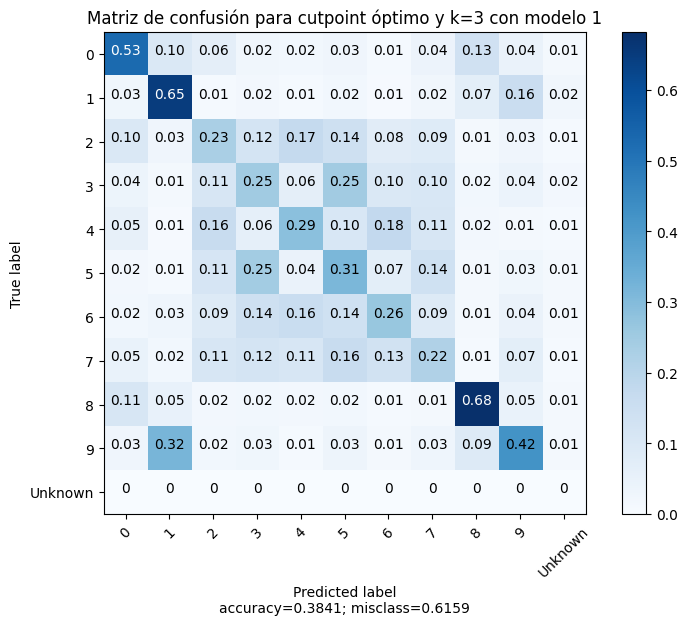

In [44]:
matches_sim_3 = model_sim.match(test_images, cutpoint=cutpoint, no_match_label=10, k=3)
cm_sim_3 = tfsim_visualization.confusion_matrix(
    matches_sim_3,
    test_labels,
    labels=labels,
    title="Matriz de confusión para cutpoint óptimo y k=3 con modelo 1",
)

313/313 [==============================] - 3s 11ms/step


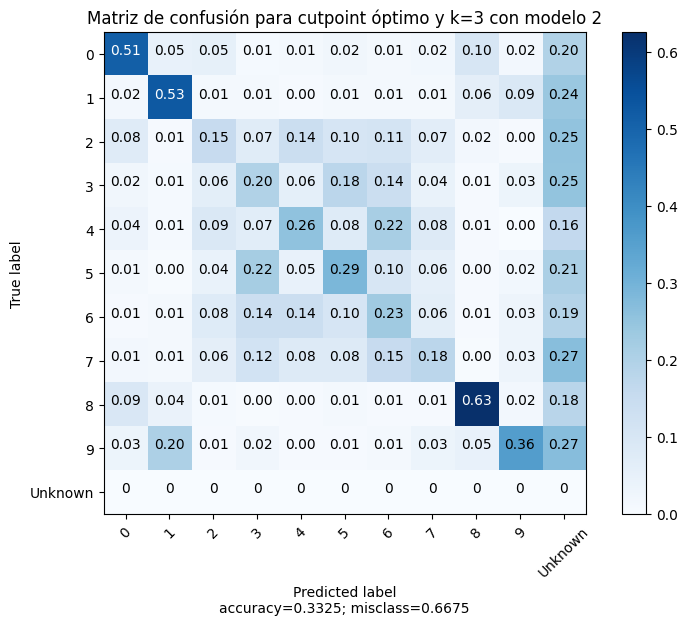

In [45]:
matches_sim_2_3 = model_sim_2.match(test_images, cutpoint=cutpoint, no_match_label=10, k=3)
cm_sim_2_3 = tfsim_visualization.confusion_matrix(
    matches_sim_2_3,
    test_labels,
    labels=labels,
    title="Matriz de confusión para cutpoint óptimo y k=3 con modelo 2",
)

313/313 [==============================] - 3s 11ms/step


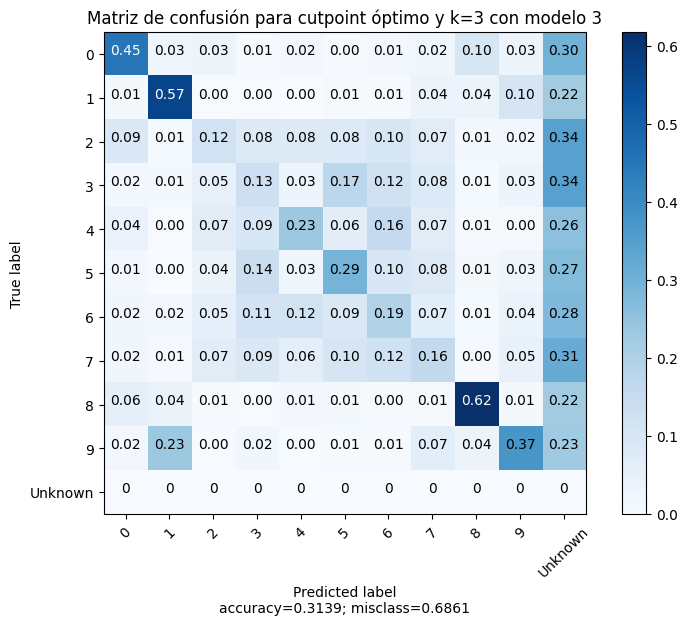

In [46]:
matches_sim_3_3 = model_sim_3.match(test_images, cutpoint=cutpoint, no_match_label=10, k=3)
cm_sim_3_3 = tfsim_visualization.confusion_matrix(
    matches_sim_3_3,
    test_labels,
    labels=labels,
    title="Matriz de confusión para cutpoint óptimo y k=3 con modelo 3",
)

313/313 [==============================] - 3s 11ms/step


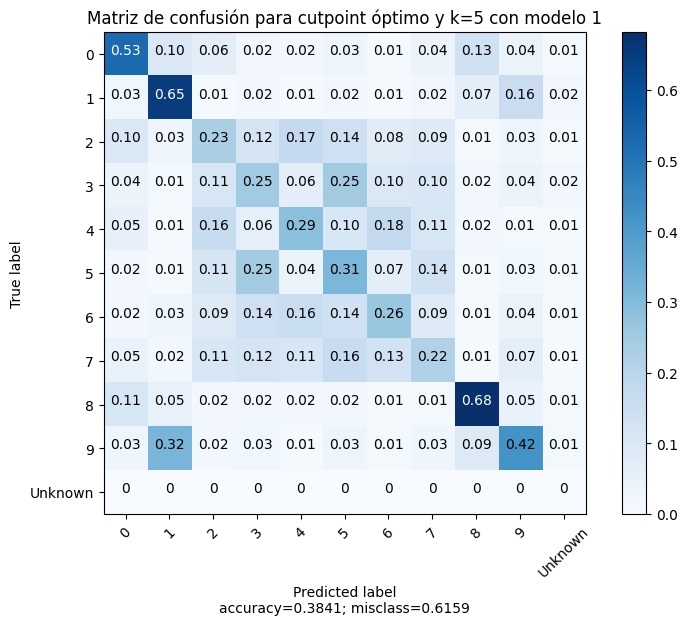

In [47]:
matches_sim_5 = model_sim.match(test_images, cutpoint=cutpoint, no_match_label=10, k=5)
cm_sim_5 = tfsim_visualization.confusion_matrix(
    matches_sim_5,
    test_labels,
    labels=labels,
    title="Matriz de confusión para cutpoint óptimo y k=5 con modelo 1",
)

313/313 [==============================] - 3s 11ms/step


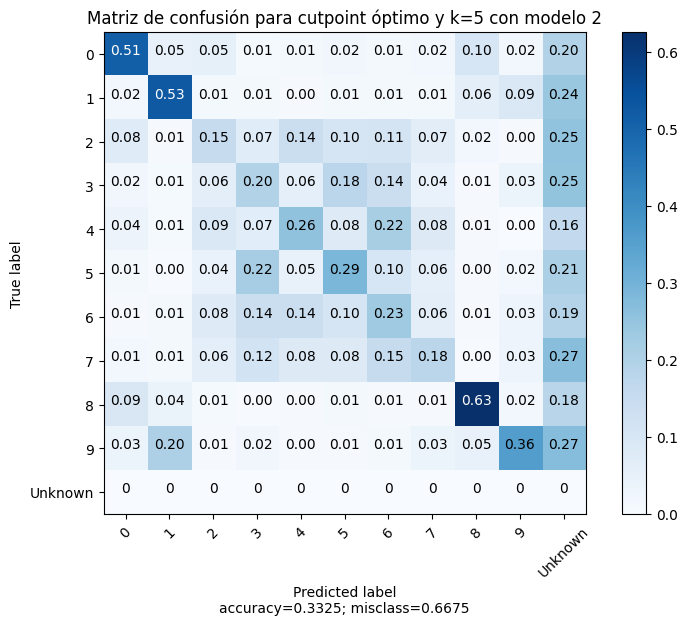

In [48]:
matches_sim_2_5 = model_sim_2.match(test_images, cutpoint=cutpoint, no_match_label=10, k=5)
cm_sim_2_5 = tfsim_visualization.confusion_matrix(
    matches_sim_2_5,
    test_labels,
    labels=labels,
    title="Matriz de confusión para cutpoint óptimo y k=5 con modelo 2",
)

313/313 [==============================] - 3s 11ms/step


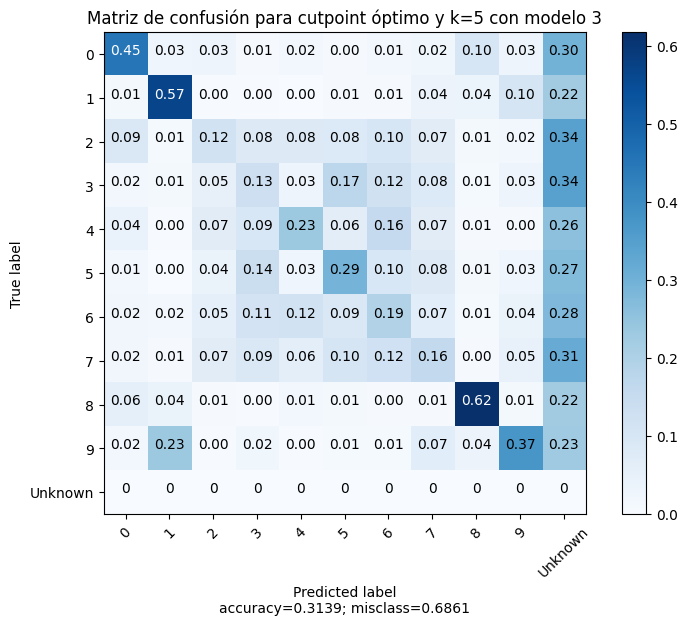

In [49]:
matches_sim_3_5 = model_sim_3.match(test_images, cutpoint=cutpoint, no_match_label=10, k=5)
cm_sim_3_5 = tfsim_visualization.confusion_matrix(
    matches_sim_3_5,
    test_labels,
    labels=labels,
    title="Matriz de confusión para cutpoint óptimo y k=5 con modelo 3",
)